In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 133M/149M [00:00<00:00, 251MB/s]
100% 149M/149M [00:00<00:00, 252MB/s]


In [ ]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):

          # Iterate through images in the label directory
          for image in os.listdir(label_path):
              image_path = os.path.join(label_path, image)

              # Add class and path to respective lists
              classes.append(label)
              class_paths.append(label_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes })

    return df

In [ ]:
# training data frame
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/pituitary,pituitary
1,/content/Training/pituitary,pituitary
2,/content/Training/pituitary,pituitary
3,/content/Training/pituitary,pituitary
4,/content/Training/pituitary,pituitary
...,...,...
5707,/content/Training/notumor,notumor
5708,/content/Training/notumor,notumor
5709,/content/Training/notumor,notumor
5710,/content/Training/notumor,notumor


In [ ]:
# testing data frame
ts_df = get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/pituitary,pituitary
1,/content/Testing/pituitary,pituitary
2,/content/Testing/pituitary,pituitary
3,/content/Testing/pituitary,pituitary
4,/content/Testing/pituitary,pituitary
...,...,...
1306,/content/Testing/notumor,notumor
1307,/content/Testing/notumor,notumor
1308,/content/Testing/notumor,notumor
1309,/content/Testing/notumor,notumor


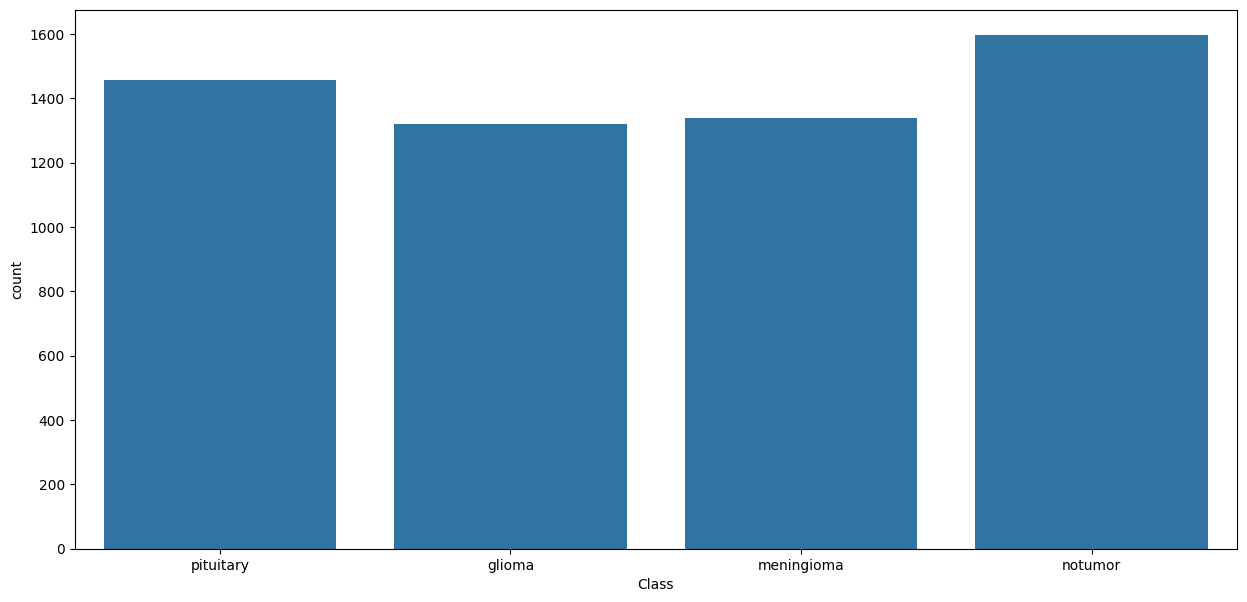

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

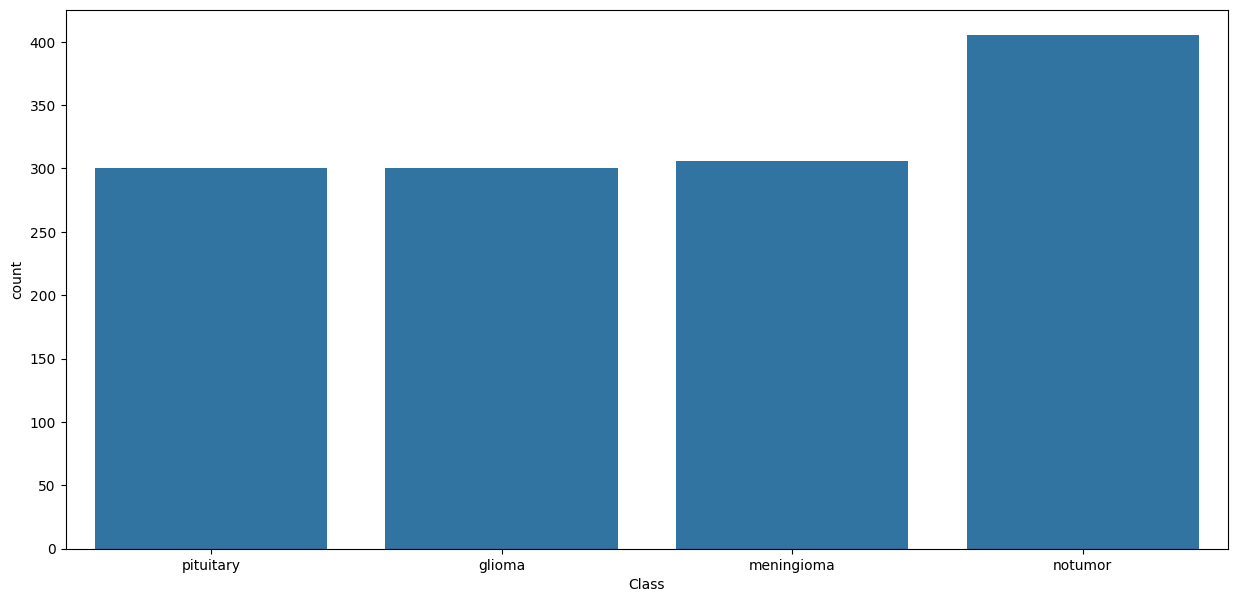

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matriximport tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator